**The Environment**

The environment for this project is a graph of nodes connected by edges. The agent, the prey, and the predator,
can move between the nodes along the edges. There are 50 nodes, numbered 1 to 50, connected in a large circle.

Additionally, add edges at random to increase connectivity across the circle, in the following way:

 Picking a random node with degree less than 3,
 add an edge between it and one node within 5 steps forward or backward along the primary loop. (So node 10
might get connected to node 7 or node 15, but not node 16.)
 Do this until no more edges can be added.

Graph Theory Question: With this setup, you can add at most 25 additional edges (why?). Are you
always able to add this many? If not, what's the smallest number of edges you're always able to add?*

*Creating circle loop grapgh*

In [243]:
def creategraph():
    graph = {}

    nodes = 50
    for node in range(1,nodes+1):
        graph[node] = set()

    for node in range(1,nodes):
        if node != 1:
            graph[node].add(node-1)
        
        graph[node].add(node+1)
        #graph[node+1].add(node)
        if node == 49:
            graph[50].add(node)
            graph[50].add(1)
            graph[1].add(50)
    #print("The circle loop graph generates is:\n",graph)
    return graph
graph = creategraph()


*Adding extra edges to the graph*

In [244]:
import random

#degree_reached = False
#while degree_reached == False:
def add_edges_to_graph(graph):
    old_dic = {}
    while old_dic != graph:
        old_dic = graph
        for node in range(1,51):
            #print(graph[node])
            if len(graph[node]) < 3:
                #print("aya")
                if random.choice([1,0]) == 1: #* if 1 the add edge
                    add_to_node = node + random.choice([random.randint(1,6),random.randint(-5,-1)])
                    #print("add to node: ", add_to_node)
                    if add_to_node < 1:
                        add_to_node = add_to_node + 50 
                    elif add_to_node > 50:
                            add_to_node = add_to_node - 50
                    if len(graph[add_to_node]) < 3:
                        graph[node].add(add_to_node)
                        graph[add_to_node].add(node)
                        
                #else:
            #    degree_reached = True

    #print(graph)
    return graph
graph = add_edges_to_graph(graph)


Generating Multiple Mazes

In [245]:
# import pandas as pd

def gen_100_graphs():
    Graph100 = {}
    for num in range(100):
        graph = creategraph()
        graph = add_edges_to_graph(graph)
        Graph100[num] = graph
    
    return Graph100
    
Graph100 = gen_100_graphs()
graph = Graph100[0] #* we are using this graph
print(graph)
#print(Graph100)


{1: {2, 50}, 2: {48, 1, 3}, 3: {2, 4}, 4: {9, 3, 5}, 5: {4, 6}, 6: {12, 5, 7}, 7: {8, 6}, 8: {9, 13, 7}, 9: {8, 10, 4}, 10: {9, 11}, 11: {10, 12}, 12: {11, 13, 6}, 13: {8, 12, 14}, 14: {16, 13, 15}, 15: {16, 14}, 16: {17, 14, 15}, 17: {16, 18}, 18: {17, 19, 20}, 19: {18, 20}, 20: {18, 19, 21}, 21: {20, 22}, 22: {21, 23}, 23: {24, 27, 22}, 24: {25, 29, 23}, 25: {24, 26}, 26: {25, 27, 30}, 27: {26, 28, 23}, 28: {33, 27, 29}, 29: {24, 28, 30}, 30: {26, 29, 31}, 31: {32, 30}, 32: {33, 34, 31}, 33: {32, 34, 28}, 34: {32, 33, 35}, 35: {34, 36}, 36: {35, 37, 38}, 37: {36, 38}, 38: {36, 37, 39}, 39: {40, 38}, 40: {41, 44, 39}, 41: {40, 42}, 42: {41, 43}, 43: {42, 44, 46}, 44: {40, 43, 45}, 45: {44, 46}, 46: {43, 45, 47}, 47: {48, 50, 46}, 48: {49, 2, 47}, 49: {48, 50}, 50: {49, 1, 47}}


Visualising the graph created

In [246]:
# import numpy as np
# import networkx as nx
# from pyvis.network import Network


# G = nx.from_dict_of_lists(graph, create_using=nx.MultiDiGraph)
# G2 = Network()
# G2.from_nx(G)
# G2.show('network_map.html')

Prey and Predator

Retraced shortest path

In [247]:
def retraced_path(prev,curr_node,goal): #* changed prev in func def
    #print("entering retracd path") #* no need to print
    fwd_path = {}
    #fwd_stack = LifoQueue()
    cell = goal #4,4
    
    while prev[cell]!= None and cell != curr_node  :
        
        fwd_path[prev[cell]] = cell
        #fwd_stack.put((cell,prev[cell]))
        cell = prev[cell]
        
   
     #* return the path to be followed by the agent in the order from starting to end
    return len(fwd_path.keys())

Spawning Agent, prey, predator

In [248]:
Positions = {"Agent": None,"Prey":None,"Pred":None}

def spawn(graph,Positions):
    Agent_pos = random.choice(list(graph.keys()))
    Positions["Agent"] = Agent_pos
    while Positions["Prey"] == None and Positions["Pred"] == None:
        prey_pos = random.choice(list(graph.keys()))
        pred_pos = random.choice(list(graph.keys()))

        if Positions["Prey"] == None:
            Positions["Prey"] = prey_pos
        if Positions["Pred"] == None:
            Positions["Pred"] = pred_pos
    return Positions

Positions = spawn(graph,Positions)
    


In [249]:
import numpy as np
import random
import math

from queue import Queue 

def bfs(curr_pred_node,curr_agent_node):
    goal = curr_agent_node
    queue = Queue()
    prev = {
        curr_pred_node: None
    }
    visited = set()
    queue.put(curr_pred_node)
    #explore = []
    while queue.empty() == False:
        curr_state = queue.get()
        
        
        if curr_state not in visited:
           # explore.append(curr_state)
        
            if curr_state == goal:
                #print("found the path for agent 1") #, curr_state,prev) # #* no need to print
                #print(explore) #* no need to print
                shortest_path = retraced_path(prev,curr_pred_node,goal)
                return shortest_path
                #break
            else:
                for child in graph[curr_state]:
                    if child not in visited : 
                    
                        queue.put(child)
                        if child not in prev.keys():# --> check this
                            prev[child] = curr_state
                visited.add(curr_state)
    
    return 




def move_prey(curr_prey_node):
    prey_neighbors = [node for node in graph[curr_prey_node]]
    prey_neighbors.append(curr_prey_node)
    selected_prey_neighbor = random.choice(prey_neighbors)
    #print(selected_prey_neighbor)
    return(selected_prey_neighbor)
def move_predator(curr_pred_node,curr_agent_node,prob_req = False): #* added prob req for agent 5 to get the denominator of probability
    min_dist_to_agent = math.inf
    breaking_ties_list = []
    for neighbor in graph[curr_pred_node]:
        dist_to_agent = bfs(neighbor,curr_agent_node)
        if dist_to_agent <= min_dist_to_agent:
            min_dist_to_agent = dist_to_agent
            #selected_pred_neighbor = neighbor
            breaking_ties_list.append(neighbor)
    if prob_req == True:    #* added prob req for agent 5 to get the denominator of probability
        return breaking_ties_list
                
        #print(breaking_ties_list)
    selected_pred_neighbor = random.choice(breaking_ties_list)

    
    return(selected_pred_neighbor)

   # print("build function")

print("prey child chosen:" ,move_prey(5))
print("pred child chosen:",move_predator(3,49))
print(graph)
print("hello")

prey child chosen: 4
pred child chosen: 2
{1: {2, 50}, 2: {48, 1, 3}, 3: {2, 4}, 4: {9, 3, 5}, 5: {4, 6}, 6: {12, 5, 7}, 7: {8, 6}, 8: {9, 13, 7}, 9: {8, 10, 4}, 10: {9, 11}, 11: {10, 12}, 12: {11, 13, 6}, 13: {8, 12, 14}, 14: {16, 13, 15}, 15: {16, 14}, 16: {17, 14, 15}, 17: {16, 18}, 18: {17, 19, 20}, 19: {18, 20}, 20: {18, 19, 21}, 21: {20, 22}, 22: {21, 23}, 23: {24, 27, 22}, 24: {25, 29, 23}, 25: {24, 26}, 26: {25, 27, 30}, 27: {26, 28, 23}, 28: {33, 27, 29}, 29: {24, 28, 30}, 30: {26, 29, 31}, 31: {32, 30}, 32: {33, 34, 31}, 33: {32, 34, 28}, 34: {32, 33, 35}, 35: {34, 36}, 36: {35, 37, 38}, 37: {36, 38}, 38: {36, 37, 39}, 39: {40, 38}, 40: {41, 44, 39}, 41: {40, 42}, 42: {41, 43}, 43: {42, 44, 46}, 44: {40, 43, 45}, 45: {44, 46}, 46: {43, 45, 47}, 47: {48, 50, 46}, 48: {49, 2, 47}, 49: {48, 50}, 50: {49, 1, 47}}
hello


Adding Easily Distracted Predator

In [250]:
def move_distracted_predator(curr_pred_node,curr_agent_node,prob_req = False): #* added prob req for agent 5 to get the denominator of probability
    min_dist_to_agent = math.inf
    breaking_ties_list = []
    for neighbor in graph[curr_pred_node]:
        dist_to_agent = bfs(neighbor,curr_agent_node)
        if dist_to_agent <= min_dist_to_agent:
            min_dist_to_agent = dist_to_agent
            #selected_pred_neighbor = neighbor
            breaking_ties_list.append(neighbor)
    if prob_req == True:    #* added prob req for agent 5 to get the denominator of probability
        return breaking_ties_list
                
        #print(breaking_ties_list)
    pred_neighbour_close = random.choice(breaking_ties_list) #* this points to the 0.6 prob part
    #print(graph[curr_pred_node]) #* del this later
    pred_neighbour_all = random.choice(list(graph[curr_pred_node])) #* this points to the 0.4 prob part
    selected_pred_neighbor = random.choices([pred_neighbour_close,pred_neighbour_all],weights = [0.6,0.4])[0]

    
    return(selected_pred_neighbor)

Agent 1

In [251]:
def print_pos(agent1,prey1,pred1):
        # print("Agent", agent1)
        # print("prey", prey1)
        # print("Pred", pred1)
        pass

def step_count(steps):
    steps = steps+1
    return steps

def agent_one(agent_pos, prey_pos,pred_pos, maxsteps):

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps:
            return "Faliure2"
        #distances of agent from prey and pred
        x = bfs(agent_pos, prey_pos)
        y = bfs(agent_pos, pred_pos)
        cost_dic = {}

        for neighbour in graph[agent_pos]:
            
            cost_dic[neighbour] = [bfs(neighbour, prey_pos)]
            cost_dic[neighbour].append(bfs(neighbour,pred_pos))

        #Now checking conditions

        green = [ ]
        for neighbour in cost_dic:
            if cost_dic[neighbour][0] < x and cost_dic[neighbour][1] > y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            prey_pos = move_prey(prey_pos)
            pred_pos = move_predator(pred_pos, agent_pos)
            print_pos(agent_pos,prey_pos,pred_pos)
            continue

        for neighbour in cost_dic:
            if cost_dic[neighbour][0] < x and cost_dic[neighbour][1] == y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            prey_pos = move_prey(prey_pos)
            pred_pos = move_predator(pred_pos, agent_pos)
            print_pos(agent_pos,prey_pos,pred_pos)
            continue

        for neighbour in cost_dic:
            if cost_dic[neighbour][0] == x and cost_dic[neighbour][1] > y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            prey_pos = move_prey(prey_pos)
            pred_pos = move_predator(pred_pos, agent_pos)
            print_pos(agent_pos,prey_pos,pred_pos)
            continue

        for neighbour in cost_dic:
            if cost_dic[neighbour][0] == x and cost_dic[neighbour][1] == y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            prey_pos = move_prey(prey_pos)
            pred_pos = move_predator(pred_pos, agent_pos)
            print_pos(agent_pos,prey_pos,pred_pos)
            continue

        for neighbour in cost_dic:
            if cost_dic[neighbour][1] > y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            prey_pos = move_prey(prey_pos)
            pred_pos = move_predator(pred_pos, agent_pos)
            print_pos(agent_pos,prey_pos,pred_pos)
            continue

        for neighbour in cost_dic:
            if cost_dic[neighbour][1] == y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            prey_pos = move_prey(prey_pos)
            pred_pos = move_predator(pred_pos, agent_pos)
            print_pos(agent_pos,prey_pos,pred_pos)
            continue
        
        else:
            prey_pos = move_prey(prey_pos)
            pred_pos = move_predator(pred_pos, agent_pos)
            print_pos(agent_pos,prey_pos,pred_pos)
            continue
    
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"

AGENT 2

In [252]:
def agent_two_remix(agent_pos, prey_pos,pred_pos,maxsteps):

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps:
            return "Faliure2"
        #distances of agent from prey and pred
        x = bfs(agent_pos, prey_pos)
        y = bfs(agent_pos, pred_pos)
        cost_dic = {}

        for neighbour in graph[agent_pos]:
            
            cost_dic[neighbour] = [bfs(neighbour, prey_pos)]
            cost_dic[neighbour].append(bfs(neighbour,pred_pos))

        #Now checking conditions

        green = [ ]

        if y <=5:
            
            
            for neighbour in cost_dic:
                if cost_dic[neighbour][0] < x and cost_dic[neighbour][1] > y:
                    green.append(neighbour)
            if len(green)!=0:
                agent_pos =  random.choice(green)
                prey_pos = move_prey(prey_pos)
                pred_pos = move_predator(pred_pos, agent_pos)
                print_pos(agent_pos,prey_pos,pred_pos)
                continue

            for neighbour in cost_dic:
                if cost_dic[neighbour][0] < x and cost_dic[neighbour][1] == y:
                    green.append(neighbour)
            if len(green)!=0:
                agent_pos =  random.choice(green)
                prey_pos = move_prey(prey_pos)
                pred_pos = move_predator(pred_pos, agent_pos)
                print_pos(agent_pos,prey_pos,pred_pos)
                continue

            for neighbour in cost_dic:
                if cost_dic[neighbour][0] == x and cost_dic[neighbour][1] > y:
                    green.append(neighbour)
            if len(green)!=0:
                agent_pos =  random.choice(green)
                prey_pos = move_prey(prey_pos)
                pred_pos = move_predator(pred_pos, agent_pos)
                print_pos(agent_pos,prey_pos,pred_pos)
                continue

            for neighbour in cost_dic:
                if cost_dic[neighbour][0] == x and cost_dic[neighbour][1] == y:
                    green.append(neighbour)
            if len(green)!=0:
                agent_pos =  random.choice(green)
                prey_pos = move_prey(prey_pos)
                pred_pos = move_predator(pred_pos, agent_pos)
                print_pos(agent_pos,prey_pos,pred_pos)
                continue

            for neighbour in cost_dic:
                if cost_dic[neighbour][1] > y:
                    green.append(neighbour)
            if len(green)!=0:
                agent_pos =  random.choice(green)
                prey_pos = move_prey(prey_pos)
                pred_pos = move_predator(pred_pos, agent_pos)
                print_pos(agent_pos,prey_pos,pred_pos)
                continue

            for neighbour in cost_dic:
                if cost_dic[neighbour][1] == y:
                    green.append(neighbour)
            if len(green)!=0:
                agent_pos =  random.choice(green)
                prey_pos = move_prey(prey_pos)
                pred_pos = move_predator(pred_pos, agent_pos)
                print_pos(agent_pos,prey_pos,pred_pos)
                continue
            
            else:
                prey_pos = move_prey(prey_pos)
                pred_pos = move_predator(pred_pos, agent_pos)
                print_pos(agent_pos,prey_pos,pred_pos)
                continue

        else:
            
            for neighbour in cost_dic:
                if cost_dic[neighbour][0] < x:
                    green.append(neighbour)
            if len(green)!=0:
                agent_pos =  random.choice(green)
                prey_pos = move_prey(prey_pos)
                pred_pos = move_predator(pred_pos, agent_pos)
                print_pos(agent_pos,prey_pos,pred_pos)
    
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"

Agent one rules

In [253]:
def agent_one_rules(agent_pos,prey_pos,pred_pos):

    x = bfs(agent_pos, prey_pos)
    y = bfs(agent_pos, pred_pos)
    cost_dic = {}

    for neighbour in graph[agent_pos]:
        
        cost_dic[neighbour] = [bfs(neighbour, prey_pos)]
        cost_dic[neighbour].append(bfs(neighbour,pred_pos))

    #Now checking conditions

    green = [ ]
    for neighbour in cost_dic:
        if cost_dic[neighbour][0] < x and cost_dic[neighbour][1] > y:
            green.append(neighbour)
    if len(green)!=0:
        agent_pos =  random.choice(green)
        return agent_pos

    for neighbour in cost_dic:
        if cost_dic[neighbour][0] < x and cost_dic[neighbour][1] == y:
            green.append(neighbour)
    if len(green)!=0:
        agent_pos =  random.choice(green)
        return agent_pos

    for neighbour in cost_dic:
        if cost_dic[neighbour][0] == x and cost_dic[neighbour][1] > y:
            green.append(neighbour)
    if len(green)!=0:
        agent_pos =  random.choice(green)
        return agent_pos

    for neighbour in cost_dic:
        if cost_dic[neighbour][0] == x and cost_dic[neighbour][1] == y:
            green.append(neighbour)
    if len(green)!=0:
        agent_pos =  random.choice(green)
        return agent_pos

    for neighbour in cost_dic:
        if cost_dic[neighbour][1] > y:
            green.append(neighbour)
    if len(green)!=0:
        agent_pos =  random.choice(green)
        return agent_pos

    for neighbour in cost_dic:
        if cost_dic[neighbour][1] == y:
            green.append(neighbour)
    if len(green)!=0:
        agent_pos =  random.choice(green)
        return agent_pos
        
    else:
        return agent_pos


Agent two rules

In [254]:
def agent_two_rules(agent_pos,prey_pos,pred_pos):

    x = bfs(agent_pos, prey_pos)
    y = bfs(agent_pos, pred_pos)
    cost_dic = {}

    for neighbour in graph[agent_pos]:
        
        cost_dic[neighbour] = [bfs(neighbour, prey_pos)]
        cost_dic[neighbour].append(bfs(neighbour,pred_pos))

    #Now checking conditions

    green = [ ]


    if y <=5:
            
            
        for neighbour in cost_dic:
            if cost_dic[neighbour][0] < x and cost_dic[neighbour][1] > y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            return agent_pos
            

        for neighbour in cost_dic:
            if cost_dic[neighbour][0] < x and cost_dic[neighbour][1] == y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            return agent_pos
            

        for neighbour in cost_dic:
            if cost_dic[neighbour][0] == x and cost_dic[neighbour][1] > y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            return agent_pos
            

        for neighbour in cost_dic:
            if cost_dic[neighbour][0] == x and cost_dic[neighbour][1] == y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            return agent_pos
            

        for neighbour in cost_dic:
            if cost_dic[neighbour][1] > y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            return agent_pos
            

        for neighbour in cost_dic:
            if cost_dic[neighbour][1] == y:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            return agent_pos
        
        else:
            return agent_pos
                

    else:
            
        for neighbour in cost_dic:
            if cost_dic[neighbour][0] < x:
                green.append(neighbour)
        if len(green)!=0:
            agent_pos =  random.choice(green)
            return agent_pos
    
    return agent_pos
        



Functions for agent 3 and 4


In [255]:
def prey_prob_initial(graph,agent_pos):
    prob_dic = {}
    for nodes in graph:
        if nodes == agent_pos:
            prob_dic[nodes] = 0
        else:
            prob_dic[nodes] = 1/49
    return prob_dic

def prey_prob_updates_Agent(prob_dic,prey_found,surveyed_node):
    prob_dic_update = {}
    for nodes in prob_dic:
        if prey_found == False: #* Case 1
            if nodes != surveyed_node:
                prob_dic_update[nodes] = prob_dic[nodes] / (1 - prob_dic[surveyed_node])
            else:
                prob_dic_update[nodes] = 0
        elif prey_found == True: #* Case 2
            if nodes != surveyed_node:
                prob_dic_update[nodes] = 0
            else:
                prob_dic_update[nodes] = 1
    
    #prob_dic = prob_dic_update
    return prob_dic_update

def prey_prob_updates_prey(prob_dic,graph): #* When prey moves, ie. t+1
    prob_dic_update = {}
    for nodes in prob_dic:
        prob_update = 0
        for sub_nodes in prob_dic:
            if sub_nodes == nodes:
                prob_update +=  prob_dic[sub_nodes] * (1/(len(graph[sub_nodes])+1)) # was 0
            else:
                if nodes in graph[sub_nodes]:
                    prob_update += prob_dic[sub_nodes] * (1/(len(graph[sub_nodes])+1))
                else:
                    prob_update += 0
        prob_dic_update[nodes] = prob_update
    
    return prob_dic_update




Agent 3

In [256]:
def node_survey(node, prey_pos):
    if node == prey_pos:
        return(True)
    else:
        return(False)


def agent_three(agent_pos, prey_pos,pred_pos,maxsteps):
    
    prob_dic = prey_prob_initial(graph,agent_pos)
    

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"

        #Surveying a node
        survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        result = node_survey(survey_node,prey_pos)
        if result == True:
            confidence.append(True)
        else:
            confidence.append(False)

        #Update probability at time t with new info
        prob_dic = prey_prob_updates_Agent(prob_dic,result,survey_node)

        #getting the assumed prey postion
        pseudo_prey_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        
        #agent moves
        agent_pos= agent_one_rules(agent_pos, pseudo_prey_pos, pred_pos)
        Result =  (agent_pos == prey_pos)
        if Result == True:
            return "Success"
        #Update probability at time t with new info
        prob_dic = prey_prob_updates_Agent(prob_dic,Result,agent_pos)
        
        
        prey_pos = move_prey(prey_pos)

        #Update probability at time t+1
        prob_dic = prey_prob_updates_prey(prob_dic,graph)
        

        pred_pos = move_predator(pred_pos, agent_pos) 
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"

Agent 4

In [257]:
def agent_four(agent_pos, prey_pos,pred_pos,maxsteps):

    #Initializing dictionary 
    # prob_dic = {}
    # for i in range(1,51):
    #     prob_dic[i] = 1/49

    prob_dic = prey_prob_initial(graph,agent_pos)
    

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"

        #Surveying a node
        survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        result = node_survey(survey_node,prey_pos)

        if result == True:
            confidence.append(True)
        else:
            confidence.append(False)

        #Update probability at time t with new info
        prob_dic = prey_prob_updates_Agent(prob_dic,result,survey_node)

        #getting the assumed prey postion
        pseudo_prey_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        
        #agent moves
        agent_pos= agent_two_rules(agent_pos, pseudo_prey_pos, pred_pos)
        Result =  (agent_pos == prey_pos)
        if Result == True:
            return "Success"
            
        #Update probability at time t with new info
        prob_dic = prey_prob_updates_Agent(prob_dic,Result,agent_pos)
        
        
        prey_pos = move_prey(prey_pos)

        #Update probability at time t+1
        prob_dic = prey_prob_updates_prey(prob_dic,graph)

        pred_pos = move_predator(pred_pos, agent_pos) 
         
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"   

Functions for agent 5 and 6

In [258]:
def pred_prob_initial(graph,agent_pos,pred_start): #* pred start is the pred initial position (Writeup currently mentions that agent knows pred's start position)
    prob_dic = {}
    for nodes in graph:
        if nodes == agent_pos:
            prob_dic[nodes] = 0
        elif nodes == pred_start:
            prob_dic[nodes] = 1
        else:
            prob_dic[nodes] = 0
    #print("Beleif sum initial: ",sum(prob_dic.values())) #* del this later
    return prob_dic

def pred_prob_updates_Agent(prob_dic,pred_found,surveyed_node):
    prob_dic_update = {}
    for nodes in prob_dic:
        if pred_found == False: #* Case 1
            if nodes != surveyed_node:
                prob_dic_update[nodes] = prob_dic[nodes] / (1 - prob_dic[surveyed_node])
            else:
                prob_dic_update[nodes] = 0
        elif pred_found == True: #* Case 2
            if nodes != surveyed_node:
                prob_dic_update[nodes] = 0
            else:
                prob_dic_update[nodes] = 1
    
    #prob_dic = prob_dic_update
    #print("Beleif sum survey/move: ",sum(prob_dic.values())) #* del this later
    return prob_dic_update

def pred_prob_updates_pred(prob_dic,graph,agent_pos): #* When pred moves, ie. t+1
    prob_dic_update = {}
    for nodes in prob_dic:
        prob_update = 0
        for sub_nodes in prob_dic:
            if sub_nodes == nodes:
                #prob_update +=  prob_dic[sub_nodes] * (1/(len(graph[sub_nodes])+1)) # was 0
                prob_update += 0
            else:
                if nodes in graph[sub_nodes]:
                    num_options_pred = move_distracted_predator(sub_nodes,agent_pos,True) #* prob req = True for getting prob denominator from move_predator func
                    if nodes in num_options_pred:
                        #if random.choices([0.6,0.4],[0.6,0.4])[0] == 0.6:
                        prob_update += prob_dic[sub_nodes] * ((0.6 / len(num_options_pred)) + (0.4 / len(graph[sub_nodes])))  #(random.choices([0.6,0.4],[0.6,0.4])[0]/len(num_options_pred)) #* check this changed
                        # else:
                        #     prob_update += prob_dic[sub_nodes] * (0.4 / len(num_options_pred))

                    else:
                        prob_update+= prob_dic[sub_nodes] * (0.4 / len(graph[sub_nodes]))
                    #prob_update += prob_dic[sub_nodes] * (1/(len(graph[sub_nodes])+1))
                else:
                    prob_update += 0
        prob_dic_update[nodes] = prob_update
    #print("Beleif sum pred move: ",sum(prob_dic.values())) #* del this later
    return prob_dic_update



Agent 5

In [259]:
def agent_five(agent_pos, prey_pos,pred_pos,maxsteps):

    prob_dic = pred_prob_initial(graph,agent_pos,pred_pos) #If we kno where the pred starts
    #prob_dic = prey_prob_initial(graph,agent_pos)

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"

        #Surveying a node
        survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        result = node_survey(survey_node,pred_pos)
        if result == True:
            confidence.append(True)
        else:
            confidence.append(False)
            
        #Update probability at time t with new info
        prob_dic = pred_prob_updates_Agent(prob_dic,result,survey_node)

        #getting the assumed prey postion
        pseudo_pred_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        
        #agent moves
        agent_pos= agent_one_rules(agent_pos, prey_pos, pseudo_pred_pos)
        Result =  (agent_pos == pred_pos)
        if(Result == True):
            return "Faliure1"

        #Update probability at time t with new info
        prob_dic = pred_prob_updates_Agent(prob_dic,Result,agent_pos)
       
        
        prey_pos = move_prey(prey_pos)

        #pred_pos = move_predator(pred_pos, agent_pos) #* bec of the new writeup
        pred_pos = move_distracted_predator(pred_pos, agent_pos) 

                #Update probability at time t+1
        prob_dic = pred_prob_updates_pred(prob_dic,graph, agent_pos)
        
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"   

#agent_five(14,45,5,1)

Agent 6

In [260]:
def agent_six(agent_pos, prey_pos,pred_pos,maxsteps):

    prob_dic = pred_prob_initial(graph,agent_pos,pred_pos) #If we kno where the pred starts
    #prob_dic = prey_prob_initial(graph,agent_pos)

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"

        #Surveying a node
        survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        result = node_survey(survey_node,pred_pos)
        if result == True:
            confidence.append(True)
        else:
            confidence.append(False)
        
        #Update probability at time t with new info
        prob_dic = pred_prob_updates_Agent(prob_dic,result,survey_node)

        #getting the assumed prey postion
        pseudo_pred_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        
        #agent moves
        agent_pos= agent_two_rules(agent_pos, prey_pos, pseudo_pred_pos)
        Result =  (agent_pos == pred_pos)
        if(Result == True):
            return "Faliure1"

        #Update probability at time t with new info
        prob_dic = pred_prob_updates_Agent(prob_dic,Result,agent_pos)
       
        
        prey_pos = move_prey(prey_pos)

        #pred_pos = move_predator(pred_pos, agent_pos) #* bec of the new writeup
        pred_pos = move_distracted_predator(pred_pos, agent_pos) 

                #Update probability at time t+1
        prob_dic = pred_prob_updates_pred(prob_dic,graph, agent_pos)
        
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"   

#agent_six(14,45,5,100)

Agent 7

In [261]:
def agent_seven(agent_pos, prey_pos,pred_pos,maxsteps):

    prob_dic = pred_prob_initial(graph,agent_pos,pred_pos) #If we kno where the pred starts
    #prob_dic = prey_prob_initial(graph,agent_pos)

    prob_dic_prey = prey_prob_initial(graph, agent_pos) #prey probability dictionary

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"

        #Surveying a node
        if len([key for key, value in prob_dic.items() if value >= 0.5]) == 0:
            survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
            result_pred = node_survey(survey_node,pred_pos)
            result_prey = node_survey(survey_node,prey_pos)
        else:
            survey_node = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())]) # surveying for prey
            result_pred = node_survey(survey_node,pred_pos)
            result_prey = node_survey(survey_node,prey_pos)
            

        #Update probability at time t with new info for both prey and predator
        prob_dic = pred_prob_updates_Agent(prob_dic,result_pred,survey_node)
        prob_dic_prey =  prey_prob_updates_Agent(prob_dic_prey,result_prey,survey_node) # for prey
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))

        #getting the assumed prey postion
        pseudo_pred_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        pseudo_prey_pos = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())])
        
        #agent moves
        agent_pos= agent_one_rules(agent_pos, pseudo_prey_pos, pseudo_pred_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"
        Prey_Result =  (agent_pos == prey_pos)
        if(Prey_Result == True):
            return "Success"

        #Update probability at time t with new info
        prob_dic = pred_prob_updates_Agent(prob_dic,Pred_Result,agent_pos)
        prob_dic_prey = prey_prob_updates_Agent(prob_dic_prey, Prey_Result, agent_pos)
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
       
        #moving prey
        prey_pos = move_prey(prey_pos)

        #pred_pos = move_predator(pred_pos, agent_pos) #* bec of the new writeup
        pred_pos = move_distracted_predator(pred_pos, agent_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"

                #Update probability at time t+1
        prob_dic = pred_prob_updates_pred(prob_dic,graph, agent_pos)
        prob_dic_prey = prey_prob_updates_prey(prob_dic_prey, graph)
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
        
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"   

Agent 8

In [262]:
def agent_eight(agent_pos, prey_pos,pred_pos,maxsteps):

    prob_dic = pred_prob_initial(graph,agent_pos,pred_pos) #If we kno where the pred starts
    #prob_dic = prey_prob_initial(graph,agent_pos)

    prob_dic_prey = prey_prob_initial(graph, agent_pos) #prey probability dictionary

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"


        #Surveying a node
        if len([key for key, value in prob_dic.items() if value >= 0.5]) == 0:
            survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
            result_pred = node_survey(survey_node,pred_pos)
            result_prey = node_survey(survey_node,prey_pos)
        else:
            survey_node = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())]) # surveying for prey
            result_pred = node_survey(survey_node,pred_pos)
            result_prey = node_survey(survey_node,prey_pos)
            

        #Update probability at time t with new info for both prey and predator
        prob_dic = pred_prob_updates_Agent(prob_dic,result_pred,survey_node)
        prob_dic_prey =  prey_prob_updates_Agent(prob_dic_prey,result_prey,survey_node) # for prey
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))

        #getting the assumed prey postion
        pseudo_pred_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        pseudo_prey_pos = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())])
        
        #agent moves
        agent_pos= agent_two_rules(agent_pos, pseudo_prey_pos, pseudo_pred_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"
        Prey_Result =  (agent_pos == prey_pos)
        if(Prey_Result == True):
            return "Success"

        #Update probability at time t with new info
        prob_dic = pred_prob_updates_Agent(prob_dic,Pred_Result,agent_pos)
        prob_dic_prey = prey_prob_updates_Agent(prob_dic_prey, Prey_Result, agent_pos)
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
       
        #moving prey
        prey_pos = move_prey(prey_pos)

        #pred_pos = move_predator(pred_pos, agent_pos) #* bec of the new writeup
        pred_pos = move_distracted_predator(pred_pos, agent_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"

                #Update probability at time t+1
        prob_dic = pred_prob_updates_pred(prob_dic,graph, agent_pos)
        prob_dic_prey = prey_prob_updates_prey(prob_dic_prey, graph)
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
        
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"   

Agent 7 Modified functions

In [263]:
#0.9 probability that the result of surveyed node is correct
def prey_prob_updates_Agent_modified(prob_dic,prey_found,surveyed_node):
    prob_dic_update = {}
    for nodes in prob_dic:
        if prey_found == False: #* Case 1
            if nodes != surveyed_node:
                prob_dic_update[nodes] = prob_dic[nodes] / (1 - 0.9*prob_dic[surveyed_node])# prob_dic[nodes] / (1 - prob_dic[surveyed_node])
            else:
                prob_dic_update[nodes] = 0.1*prob_dic[nodes]/(1-0.9*prob_dic[nodes])# 0
        elif prey_found == True: #* Case 2
            if nodes != surveyed_node:
                prob_dic_update[nodes] = 0
            else:
                prob_dic_update[nodes] = 1
    
    #prob_dic = prob_dic_update
    return prob_dic_update

def pred_prob_updates_Agent_modified(prob_dic,pred_found,surveyed_node):
    prob_dic_update = {}
    for nodes in prob_dic:
        if pred_found == False: #* Case 1
            if nodes != surveyed_node:
                prob_dic_update[nodes] = prob_dic[nodes] / (1 - 0.9*prob_dic[surveyed_node])# prob_dic[nodes] / (1 - prob_dic[surveyed_node])
            else:
                prob_dic_update[nodes] = 0.1*prob_dic[nodes]/(1-0.9*prob_dic[nodes]) #0
        elif pred_found == True: #* Case 2
            if nodes != surveyed_node:
                prob_dic_update[nodes] = 0
            else:
                prob_dic_update[nodes] = 1
    
    #prob_dic = prob_dic_update
    #print("Beleif sum survey/move: ",sum(prob_dic.values())) #* del this later
    return prob_dic_update

Agent 7 modified

In [264]:
def agent_seven_modified(agent_pos, prey_pos,pred_pos,maxsteps):

    prob_dic = pred_prob_initial(graph,agent_pos,pred_pos) #If we kno where the pred starts
    #prob_dic = prey_prob_initial(graph,agent_pos)

    prob_dic_prey = prey_prob_initial(graph, agent_pos) #prey probability dictionary

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"

        #Surveying a node
        if len([key for key, value in prob_dic.items() if value >= 0.5]) == 0:
            survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
            result_pred = node_survey(survey_node,pred_pos)
            if result_pred == True:
                result_pred = random.choices([True, False],[0.9,0.1])[0]
            result_prey = node_survey(survey_node,prey_pos)
            if result_prey == True:
                result_prey = random.choices([True, False],[0.9,0.1])[0]
        else:
            survey_node = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())]) # surveying for prey
            result_pred = node_survey(survey_node,pred_pos)
            if result_pred == True:
                result_pred = random.choices([True, False],[0.9,0.1])[0]
            result_prey = node_survey(survey_node,prey_pos)
            if result_prey == True:
                result_prey = random.choices([True, False],[0.9,0.1])[0]
            

        #Update probability at time t with new info for both prey and predator
        prob_dic = pred_prob_updates_Agent_modified(prob_dic,result_pred,survey_node)
        prob_dic_prey =  prey_prob_updates_Agent_modified(prob_dic_prey,result_prey,survey_node) # for prey
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))

        #getting the assumed prey postion
        pseudo_pred_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        pseudo_prey_pos = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())])
        
        #agent moves
        agent_pos= agent_one_rules(agent_pos, pseudo_prey_pos, pseudo_pred_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"
        Prey_Result =  (agent_pos == prey_pos)
        if(Prey_Result == True):
            return "Success"

        #Update probability at time t with new info
        prob_dic = pred_prob_updates_Agent(prob_dic,Pred_Result,agent_pos)
        prob_dic_prey = prey_prob_updates_Agent(prob_dic_prey, Prey_Result, agent_pos)
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
       
        #moving prey
        prey_pos = move_prey(prey_pos)

        #pred_pos = move_predator(pred_pos, agent_pos) #* bec of the new writeup
        pred_pos = move_distracted_predator(pred_pos, agent_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"

                #Update probability at time t+1
        prob_dic = pred_prob_updates_pred(prob_dic,graph, agent_pos)
        prob_dic_prey = prey_prob_updates_prey(prob_dic_prey, graph)
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
        
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"   

Agent 8 Modified

In [265]:
def agent_eight_modified(agent_pos, prey_pos,pred_pos,maxsteps):

    prob_dic = pred_prob_initial(graph,agent_pos,pred_pos) #If we kno where the pred starts
    #prob_dic = prey_prob_initial(graph,agent_pos)

    prob_dic_prey = prey_prob_initial(graph, agent_pos) #prey probability dictionary

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"


       #Surveying a node
        if len([key for key, value in prob_dic.items() if value >= 0.5]) == 0:
            survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
            result_pred = node_survey(survey_node,pred_pos)
            if result_pred == True:
                result_pred = random.choices([True, False],[0.9,0.1])[0]
            result_prey = node_survey(survey_node,prey_pos)
            if result_prey == True:
                result_prey = random.choices([True, False],[0.9,0.1])[0]
        else:
            survey_node = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())]) # surveying for prey
            result_pred = node_survey(survey_node,pred_pos)
            if result_pred == True:
                result_pred = random.choices([True, False],[0.9,0.1])[0]
            result_prey = node_survey(survey_node,prey_pos)
            if result_prey == True:
                result_prey = random.choices([True, False],[0.9,0.1])[0]
            
        #Update probability at time t with new info for both prey and predator
        prob_dic = pred_prob_updates_Agent_modified(prob_dic,result_pred,survey_node)
        prob_dic_prey =  prey_prob_updates_Agent_modified(prob_dic_prey,result_prey,survey_node) # for prey

        #getting the assumed prey postion
        pseudo_pred_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        pseudo_prey_pos = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())])
        
        #agent moves
        agent_pos= agent_two_rules(agent_pos, pseudo_prey_pos, pseudo_pred_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"
        Prey_Result =  (agent_pos == prey_pos)
        if(Prey_Result == True):
            return "Success"

        #Update probability at time t with new info
        prob_dic = pred_prob_updates_Agent(prob_dic,Pred_Result,agent_pos)
        prob_dic_prey = prey_prob_updates_Agent(prob_dic_prey, Prey_Result, agent_pos)

        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
       
        #moving prey
        prey_pos = move_prey(prey_pos)

        #pred_pos = move_predator(pred_pos, agent_pos) #* bec of the new writeup
        pred_pos = move_distracted_predator(pred_pos, agent_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"

                #Update probability at time t+1
        prob_dic = pred_prob_updates_pred(prob_dic,graph, agent_pos)
        prob_dic_prey = prey_prob_updates_prey(prob_dic_prey, graph)
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"   

Modified AGent 7 without prob update

In [266]:
def agent_seven_modified_without_update(agent_pos, prey_pos,pred_pos,maxsteps):

    prob_dic = pred_prob_initial(graph,agent_pos,pred_pos) #If we kno where the pred starts
    #prob_dic = prey_prob_initial(graph,agent_pos)

    prob_dic_prey = prey_prob_initial(graph, agent_pos) #prey probability dictionary

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"

        #Surveying a node
        if len([key for key, value in prob_dic.items() if value >= 0.5]) == 0:
            survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
            result_pred = node_survey(survey_node,pred_pos)
            if result_pred == True:
                result_pred = random.choices([True, False],[0.9,0.1])[0]
            result_prey = node_survey(survey_node,prey_pos)
            if result_prey == True:
                result_prey = random.choices([True, False],[0.9,0.1])[0]
        else:
            survey_node = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())]) # surveying for prey
            result_pred = node_survey(survey_node,pred_pos)
            if result_pred == True:
                result_pred = random.choices([True, False],[0.9,0.1])[0]
            result_prey = node_survey(survey_node,prey_pos)
            if result_prey == True:
                result_prey = random.choices([True, False],[0.9,0.1])[0]
            

        #Update probability at time t with new info for both prey and predator
        prob_dic = pred_prob_updates_Agent(prob_dic,result_pred,survey_node)
        prob_dic_prey =  prey_prob_updates_Agent(prob_dic_prey,result_prey,survey_node) # for prey
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))

        #getting the assumed prey postion
        pseudo_pred_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        pseudo_prey_pos = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())])
        
        #agent moves
        agent_pos= agent_one_rules(agent_pos, pseudo_prey_pos, pseudo_pred_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"
        Prey_Result =  (agent_pos == prey_pos)
        if(Prey_Result == True):
            return "Success"

        #Update probability at time t with new info
        prob_dic = pred_prob_updates_Agent(prob_dic,Pred_Result,agent_pos)
        prob_dic_prey = prey_prob_updates_Agent(prob_dic_prey, Prey_Result, agent_pos)
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
       
        #moving prey
        prey_pos = move_prey(prey_pos)

        #pred_pos = move_predator(pred_pos, agent_pos) #* bec of the new writeup
        pred_pos = move_distracted_predator(pred_pos, agent_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"

                #Update probability at time t+1
        prob_dic = pred_prob_updates_pred(prob_dic,graph, agent_pos)
        prob_dic_prey = prey_prob_updates_prey(prob_dic_prey, graph)
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
        
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"   

Agent 8 modifies without prob updates

In [267]:
def agent_eight_modified_without_update(agent_pos, prey_pos,pred_pos,maxsteps):

    prob_dic = pred_prob_initial(graph,agent_pos,pred_pos) #If we kno where the pred starts
    #prob_dic = prey_prob_initial(graph,agent_pos)

    prob_dic_prey = prey_prob_initial(graph, agent_pos) #prey probability dictionary

    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"


       #Surveying a node
        if len([key for key, value in prob_dic.items() if value >= 0.5]) == 0:
            survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
            result_pred = node_survey(survey_node,pred_pos)
            if result_pred == True:
                result_pred = random.choices([True, False],[0.9,0.1])[0]
            result_prey = node_survey(survey_node,prey_pos)
            if result_prey == True:
                result_prey = random.choices([True, False],[0.9,0.1])[0]
        else:
            survey_node = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())]) # surveying for prey
            result_pred = node_survey(survey_node,pred_pos)
            if result_pred == True:
                result_pred = random.choices([True, False],[0.9,0.1])[0]
            result_prey = node_survey(survey_node,prey_pos)
            if result_prey == True:
                result_prey = random.choices([True, False],[0.9,0.1])[0]
            
        #Update probability at time t with new info for both prey and predator
        prob_dic = pred_prob_updates_Agent(prob_dic,result_pred,survey_node)
        prob_dic_prey =  prey_prob_updates_Agent(prob_dic_prey,result_prey,survey_node) # for prey

        #getting the assumed prey postion
        pseudo_pred_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
        pseudo_prey_pos = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())])
        
        #agent moves
        agent_pos= agent_two_rules(agent_pos, pseudo_prey_pos, pseudo_pred_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"
        Prey_Result =  (agent_pos == prey_pos)
        if(Prey_Result == True):
            return "Success"

        #Update probability at time t with new info
        prob_dic = pred_prob_updates_Agent(prob_dic,Pred_Result,agent_pos)
        prob_dic_prey = prey_prob_updates_Agent(prob_dic_prey, Prey_Result, agent_pos)

        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
       
        #moving prey
        prey_pos = move_prey(prey_pos)

        #pred_pos = move_predator(pred_pos, agent_pos) #* bec of the new writeup
        pred_pos = move_distracted_predator(pred_pos, agent_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"

                #Update probability at time t+1
        prob_dic = pred_prob_updates_pred(prob_dic,graph, agent_pos)
        prob_dic_prey = prey_prob_updates_prey(prob_dic_prey, graph)
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"   

Bonus 2

In [268]:
def agent_bonus(agent_pos, prey_pos,pred_pos,maxsteps):

    prob_dic = pred_prob_initial(graph,agent_pos,pred_pos) #If we kno where the pred starts
    #prob_dic = prey_prob_initial(graph,agent_pos)

    prob_dic_prey = prey_prob_initial(graph, agent_pos) #prey probability dictionary
    steps = 0

    while agent_pos!=prey_pos and agent_pos!=pred_pos:
        steps = step_count(steps)
        if steps > maxsteps: #supposed to be maxsteps here
            return "Faliure2"

        if len([key for key, value in prob_dic.items() if value >= 0.5]) == 0 and len([key for key, value in prob_dic_prey.items() if value >= 0.5]) == 0:
            #Surveying a node
            if len([key for key, value in prob_dic.items() if value >= 0.5]) == 0:
                survey_node = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
                result_pred = node_survey(survey_node,pred_pos)
                result_prey = node_survey(survey_node,prey_pos)
            else:
                survey_node = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())]) # surveying for prey
                result_pred = node_survey(survey_node,pred_pos)
                result_prey = node_survey(survey_node,prey_pos)
                

            #Update probability at time t with new info for both prey and predator
            prob_dic = pred_prob_updates_Agent(prob_dic,result_pred,survey_node)
            prob_dic_prey =  prey_prob_updates_Agent(prob_dic_prey,result_prey,survey_node) # for prey
            # print("Pred",sum(prob_dic.values()))
            # print("Prey",sum(prob_dic_prey.values()))

            #getting the assumed prey postion
            pseudo_pred_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
            pseudo_prey_pos = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())])

        else:
            pseudo_pred_pos = random.choice([key for key, value in prob_dic.items() if value == max(prob_dic.values())])
            pseudo_prey_pos = random.choice([key for key, value in prob_dic_prey.items() if value == max(prob_dic_prey.values())])    
            #agent moves
            agent_pos= agent_two_rules(agent_pos, pseudo_prey_pos, pseudo_pred_pos)
            Pred_Result =  (agent_pos == pred_pos)
            if(Pred_Result == True):
                return "Faliure1"
            Prey_Result =  (agent_pos == prey_pos)
            if(Prey_Result == True):
                return "Success"

            #Update probability at time t with new info
            prob_dic = pred_prob_updates_Agent(prob_dic,Pred_Result,agent_pos)
            prob_dic_prey = prey_prob_updates_Agent(prob_dic_prey, Prey_Result, agent_pos)
            # print("Pred",sum(prob_dic.values()))
            # print("Prey",sum(prob_dic_prey.values()))
       
        #moving prey
        prey_pos = move_prey(prey_pos)

        #pred_pos = move_predator(pred_pos, agent_pos) #* bec of the new writeup
        pred_pos = move_distracted_predator(pred_pos, agent_pos)
        Pred_Result =  (agent_pos == pred_pos)
        if(Pred_Result == True):
            return "Faliure1"

                #Update probability at time t+1
        prob_dic = pred_prob_updates_pred(prob_dic,graph, agent_pos)
        prob_dic_prey = prey_prob_updates_prey(prob_dic_prey, graph)
        # print("Pred",sum(prob_dic.values()))
        # print("Prey",sum(prob_dic_prey.values()))
        
        
    if agent_pos == prey_pos:
        return "Success"
    elif agent_pos == pred_pos:
        return "Faliure1"   

#Calculate Success Here

In [269]:
def Success_rate(Agent, Prey, Pred):
    steps = 0
    steps_faliure1 = 0
    steps_faliure2 = 0
    for trials in range(1): #30
        result = agent_bonus(Agent, Prey, Pred,maxsteps=150)
        if result == "Success":
            steps = step_count(steps)
        elif result == "Faliure1":
            steps_faliure1 = step_count(steps_faliure1)
        elif result == "Faliure2":
            steps_faliure2 = step_count(steps_faliure2)
    return steps, steps_faliure1, steps_faliure2


In [270]:
confidence=[]
def calc_success_rate():
    s_list=[]
    f1_list =[]
    f2_list = []
    confidence_list=[]
    # Graph100 = gen_100_graphs()
    for runs in range(30):
        print("Initializing run: ", runs+1)
        Graph100 = gen_100_graphs()
        success_run = 0
        faliure1_run = 0
        faliure2_run = 0
        for num in Graph100:
            # print("Initializing graph: ",num+1)
            graph = Graph100[num]
            Positions = {"Agent": None,"Prey":None,"Pred":None}
            Positions = spawn(graph,Positions)
            success, faliure1, faliure2 = Success_rate(Positions["Agent"], Positions["Prey"], Positions["Pred"])
            success_run=success_run+success
            faliure1_run = faliure1_run + faliure1
            faliure2_run = faliure2_run+faliure2
        s_list.append(success_run)
        f1_list.append(faliure1_run)
        f2_list.append(faliure2_run)
        
        # confidence_list.append(confidence.count(True)/len(confidence)*100)
        # confidence.clear()
    # print(np.mean(confidence_list))
        
    # print(confidence_list)

    return s_list, f1_list,f2_list

s1, f1, f2 = calc_success_rate()

print("success rate: ",(np.sum(s1)/3000)*100)
print("faliure 1 rate: ",(np.sum(f1)/3000)*100)
print("faliure 2 rate: ",(np.sum(f2)/3000)*100)



Initializing run:  1
Initializing run:  2
Initializing run:  3
Initializing run:  4
Initializing run:  5
Initializing run:  6
Initializing run:  7


In [ ]:
print("Agent bonus -- Success: ",s1," Faliure1: ", f1, " Faliure2: ",f2)

success rate:  69.0
faliure 1 rate:  30.733333333333334
faliure 2 rate:  0.26666666666666666

Agent bonus -- Success:  [71, 64, 69, 75, 68, 73, 72, 72, 65, 59, 68, 71, 67, 66, 77, 64, 68, 63, 75, 71, 71, 70, 68, 71, 70, 69, 70, 72, 62, 69]  Faliure1:  [29, 35, 31, 25, 32, 26, 28, 28, 34, 41, 32, 29, 33, 34, 23, 36, 32, 37, 24, 29, 29, 30, 32, 29, 30, 31, 29, 26, 37, 31]  Faliure2:  [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0]


Agent eight modified -- Success:  [71, 64, 69, 75, 68, 73, 72, 72, 65, 59, 68, 71, 67, 66, 77, 64, 68, 63, 75, 71, 71, 70, 68, 71, 70, 69, 70, 72, 62, 69]  Faliure1:  [29, 35, 31, 25, 32, 26, 28, 28, 34, 41, 32, 29, 33, 34, 23, 36, 32, 37, 24, 29, 29, 30, 32, 29, 30, 31, 29, 26, 37, 31]  Faliure2:  [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0]

Agent five -- Success:  [59, 75, 71, 59, 64, 69, 67, 65, 62, 67, 64, 66, 62, 58, 59, 61, 64, 67, 59, 65, 58, 67, 63, 67, 65, 64, 58, 60, 63, 64]  Faliure1:  [36, 22, 22, 36, 29, 26, 27, 25, 32, 26, 29, 27, 36, 35, 37, 32, 29, 31, 27, 29, 31, 30, 32, 26, 28, 30, 38, 35, 30, 33]  Faliure2:  [5, 3, 7, 5, 7, 5, 6, 10, 6, 7, 7, 7, 2, 7, 4, 7, 7, 2, 14, 6, 11, 3, 5, 7, 7, 6, 4, 5, 7, 3]

Agent four - Success:  [81, 89, 84, 89, 86, 84, 85, 85, 86, 84, 88, 85, 81, 89, 90, 92, 88, 85, 90, 84, 83, 83, 86, 84, 82, 89, 90, 88, 78, 86]  Faliure1:  [19, 11, 14, 11, 13, 16, 15, 14, 13, 16, 12, 15, 18, 10, 10, 6, 11, 15, 10, 16, 17, 15, 13, 15, 16, 10, 10, 11, 22, 13]  Faliure2:  [0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 1]

success rate:  85.8
faliure 1 rate:  13.566666666666666
faliure 2 rate:  0.6333333333333333

Agent three - Success:  [87, 88, 83, 82, 77, 81, 80, 84, 87, 82, 82, 82, 87, 80, 83, 84, 82, 80, 74, 81, 82, 88, 79, 83, 82, 79, 74, 78, 87, 82]  Faliure1:  [9, 10, 14, 15, 19, 16, 15, 11, 13, 14, 12, 12, 10, 15, 10, 10, 16, 17, 17, 16, 14, 8, 14, 11, 16, 14, 19, 19, 9, 15]  Faliure2:  [4, 2, 3, 3, 4, 3, 5, 5, 0, 4, 6, 6, 3, 5, 7, 6, 2, 3, 9, 3, 4, 4, 7, 6, 2, 7, 7, 3, 4, 3]

success rate:  82.0
faliure 1 rate:  13.666666666666666
faliure 2 rate:  4.333333333333334

Agent two - Success:  [97, 96, 97, 94, 96, 98, 95, 96, 95, 93, 94, 100, 97, 96, 98, 98, 97, 96, 96, 93, 96, 95, 96, 97, 96, 95, 96, 94, 96, 96]  Faliure1:  [3, 4, 3, 6, 4, 2, 5, 4, 5, 7, 6, 0, 3, 4, 2, 2, 3, 4, 4, 7, 4, 5, 4, 3, 4, 5, 4, 6, 4, 4]  Faliure2:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

success rate:  95.96666666666667
faliure 1 rate:  4.033333333333333
faliure 2 rate:  0.0

Agent six - Success:  [86, 91, 91, 87, 89, 78, 86, 91, 88, 90, 81, 81, 80, 94, 87, 82, 83, 84, 91, 82, 92, 83, 87, 91, 82, 85, 88, 87, 80, 87]  Faliure1:  [14, 9, 9, 13, 11, 22, 14, 9, 11, 10, 19, 19, 20, 6, 13, 18, 16, 15, 9, 18, 8, 17, 13, 9, 18, 15, 12, 13, 20, 13]  Faliure2:  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

success rate:  86.13333333333333
faliure 1 rate:  13.766666666666666
faliure 2 rate:  0.1

Agent seven - Success:  [71, 66, 64, 72, 68, 72, 69, 69, 73, 61, 67, 69, 60, 60, 76, 52, 66, 62, 66, 71, 71, 63, 67, 70, 68, 67, 65, 66, 70, 69]  Faliure1:  [23, 29, 31, 23, 29, 26, 28, 28, 22, 34, 29, 27, 34, 34, 19, 43, 31, 30, 30, 27, 26, 32, 24, 25, 31, 28, 29, 31, 28, 27]  Faliure2:  [6, 5, 5, 5, 3, 2, 3, 3, 5, 5, 4, 4, 6, 6, 5, 5, 3, 8, 4, 2, 3, 5, 9, 5, 1, 5, 6, 3, 2, 4]

success rate:  67.0
faliure 1 rate:  28.599999999999998
faliure 2 rate:  4.3999999999999995



Agent eight - Success:  [75, 75, 71, 73, 74, 74, 77, 74, 71, 73, 85, 78, 71, 79, 72, 81, 74, 74, 78, 70, 77, 80, 79, 80, 74, 76, 81, 78, 81, 78]  Faliure1:  [25, 23, 29, 27, 26, 25, 23, 26, 29, 27, 15, 22, 29, 21, 26, 19, 26, 26, 21, 30, 23, 20, 20, 20, 26, 22, 18, 22, 19, 22]  Faliure2:  [0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0]

Graphs Individual

In [ ]:
import matplotlib.pyplot as plt

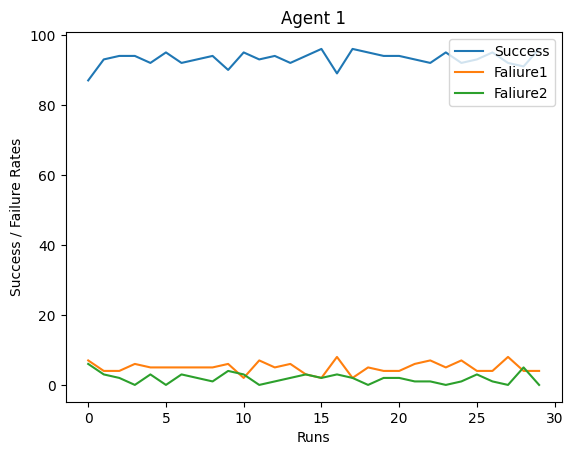

In [ ]:

#* Agent 1
Success = [87, 93, 94, 94, 92, 95, 92, 93, 94, 90, 95, 93, 94, 92, 94, 96, 89, 96, 95, 94, 94, 93, 92, 95, 92, 93, 95, 92, 91, 96]
Faliure1 =   [7, 4, 4, 6, 5, 5, 5, 5, 5, 6, 2, 7, 5, 6, 3, 2, 8, 2, 5, 4, 4, 6, 7, 5, 7, 4, 4, 8, 4, 4]  
Faliure2 =  [6, 3, 2, 0, 3, 0, 3, 2, 1, 4, 3, 0, 1, 2, 3, 2, 3, 2, 0, 2, 2, 1, 1, 0, 1, 3, 1, 0, 5, 0]

plt.plot(Success,label = "Success")
plt.plot(Faliure1,label = "Faliure1")
plt.plot(Faliure2,label = "Faliure2")
plt.legend(loc = "upper right")
plt.title("Agent 1")
plt.xlabel("Runs")
plt.ylabel("Success / Failure Rates")
plt.show()


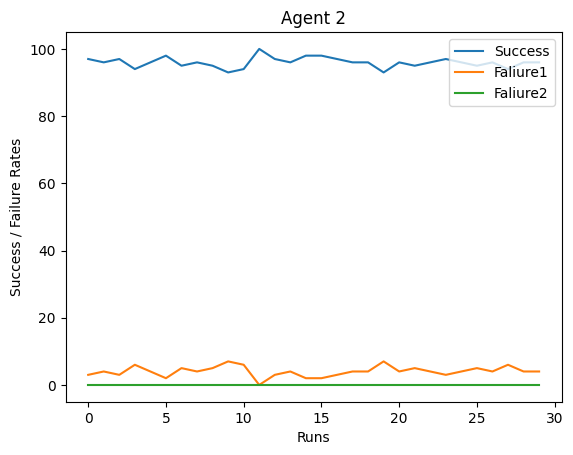

In [ ]:

#* Agent two
Success =  [97, 96, 97, 94, 96, 98, 95, 96, 95, 93, 94, 100, 97, 96, 98, 98, 97, 96, 96, 93, 96, 95, 96, 97, 96, 95, 96, 94, 96, 96] 
Faliure1 =  [3, 4, 3, 6, 4, 2, 5, 4, 5, 7, 6, 0, 3, 4, 2, 2, 3, 4, 4, 7, 4, 5, 4, 3, 4, 5, 4, 6, 4, 4]  
Faliure2 =   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.plot(Success,label = "Success")
plt.plot(Faliure1,label = "Faliure1")
plt.plot(Faliure2,label = "Faliure2")
plt.legend(loc = "upper right")
plt.title("Agent 2")
plt.xlabel("Runs")
plt.ylabel("Success / Failure Rates")
plt.show()

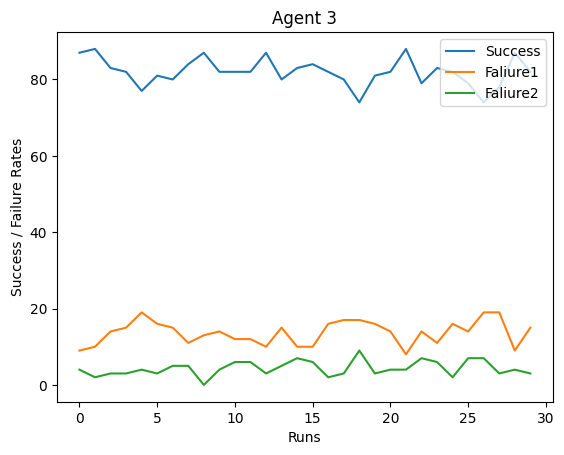

In [ ]:

#* Agent 3


Success =  [87, 88, 83, 82, 77, 81, 80, 84, 87, 82, 82, 82, 87, 80, 83, 84, 82, 80, 74, 81, 82, 88, 79, 83, 82, 79, 74, 78, 87, 82]
Faliure1 =   [9, 10, 14, 15, 19, 16, 15, 11, 13, 14, 12, 12, 10, 15, 10, 10, 16, 17, 17, 16, 14, 8, 14, 11, 16, 14, 19, 19, 9, 15] 
Faliure2 =   [4, 2, 3, 3, 4, 3, 5, 5, 0, 4, 6, 6, 3, 5, 7, 6, 2, 3, 9, 3, 4, 4, 7, 6, 2, 7, 7, 3, 4, 3]



plt.plot(Success,label = "Success")
plt.plot(Faliure1,label = "Faliure1")
plt.plot(Faliure2,label = "Faliure2")
plt.legend(loc = "upper right")
plt.title("Agent 3")
plt.xlabel("Runs")
plt.ylabel("Success / Failure Rates")
plt.show()

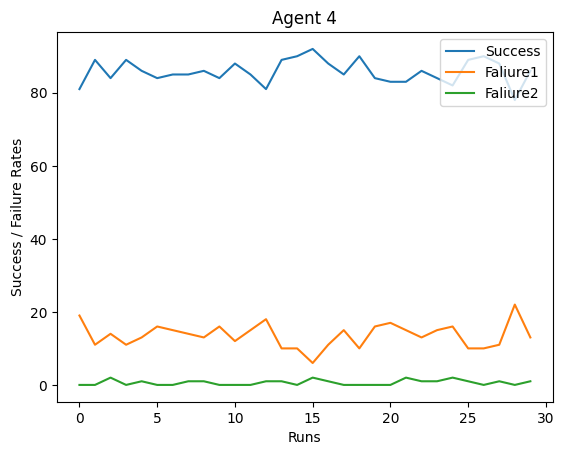

In [ ]:

#* Agent 4

Success =  [81, 89, 84, 89, 86, 84, 85, 85, 86, 84, 88, 85, 81, 89, 90, 92, 88, 85, 90, 84, 83, 83, 86, 84, 82, 89, 90, 88, 78, 86]
Faliure1 =  [19, 11, 14, 11, 13, 16, 15, 14, 13, 16, 12, 15, 18, 10, 10, 6, 11, 15, 10, 16, 17, 15, 13, 15, 16, 10, 10, 11, 22, 13]  
Faliure2 =   [0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 1]

plt.plot(Success,label = "Success")
plt.plot(Faliure1,label = "Faliure1")
plt.plot(Faliure2,label = "Faliure2")
plt.legend(loc = "upper right")
plt.title("Agent 4")
plt.xlabel("Runs")
plt.ylabel("Success / Failure Rates")
plt.show()

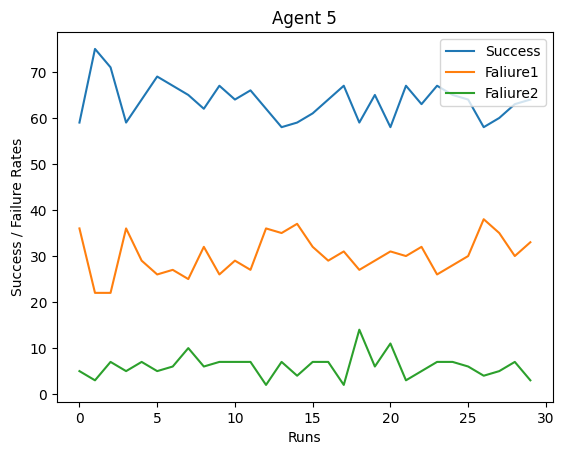

In [ ]:
#agent 5
Success =  [59, 75, 71, 59, 64, 69, 67, 65, 62, 67, 64, 66, 62, 58, 59, 61, 64, 67, 59, 65, 58, 67, 63, 67, 65, 64, 58, 60, 63, 64]  
Faliure1 =  [36, 22, 22, 36, 29, 26, 27, 25, 32, 26, 29, 27, 36, 35, 37, 32, 29, 31, 27, 29, 31, 30, 32, 26, 28, 30, 38, 35, 30, 33] 
Faliure2 =  [5, 3, 7, 5, 7, 5, 6, 10, 6, 7, 7, 7, 2, 7, 4, 7, 7, 2, 14, 6, 11, 3, 5, 7, 7, 6, 4, 5, 7, 3]

plt.plot(Success,label = "Success")
plt.plot(Faliure1,label = "Faliure1")
plt.plot(Faliure2,label = "Faliure2")
plt.legend(loc = "upper right")
plt.title("Agent 5")
plt.xlabel("Runs")
plt.ylabel("Success / Failure Rates")
plt.show()

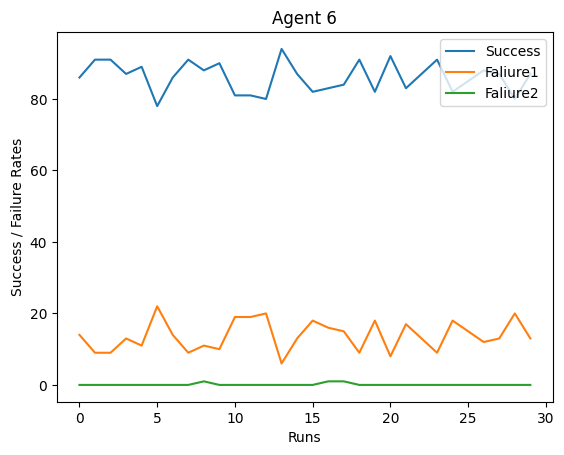

In [ ]:

#* Agent 6

Success =  [86, 91, 91, 87, 89, 78, 86, 91, 88, 90, 81, 81, 80, 94, 87, 82, 83, 84, 91, 82, 92, 83, 87, 91, 82, 85, 88, 87, 80, 87]  
Faliure1 =   [14, 9, 9, 13, 11, 22, 14, 9, 11, 10, 19, 19, 20, 6, 13, 18, 16, 15, 9, 18, 8, 17, 13, 9, 18, 15, 12, 13, 20, 13]  
Faliure2 =  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.plot(Success,label = "Success")
plt.plot(Faliure1,label = "Faliure1")
plt.plot(Faliure2,label = "Faliure2")
plt.legend(loc = "upper right")
plt.title("Agent 6")
plt.xlabel("Runs")
plt.ylabel("Success / Failure Rates")
plt.show()


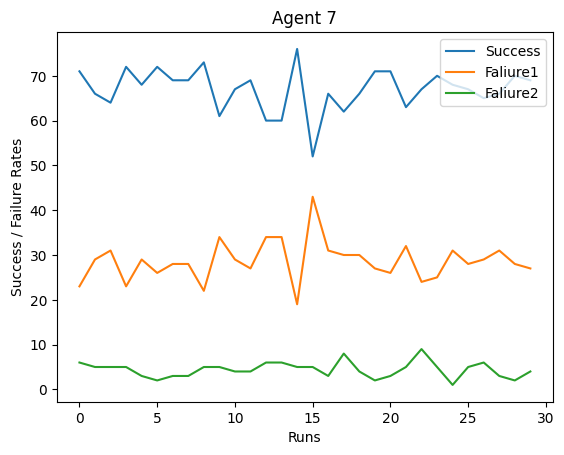

In [ ]:
#* Agent 7

Success =  [71, 66, 64, 72, 68, 72, 69, 69, 73, 61, 67, 69, 60, 60, 76, 52, 66, 62, 66, 71, 71, 63, 67, 70, 68, 67, 65, 66, 70, 69]
Faliure1 =   [23, 29, 31, 23, 29, 26, 28, 28, 22, 34, 29, 27, 34, 34, 19, 43, 31, 30, 30, 27, 26, 32, 24, 25, 31, 28, 29, 31, 28, 27]
Faliure2 =   [6, 5, 5, 5, 3, 2, 3, 3, 5, 5, 4, 4, 6, 6, 5, 5, 3, 8, 4, 2, 3, 5, 9, 5, 1, 5, 6, 3, 2, 4]

plt.plot(Success,label = "Success")
plt.plot(Faliure1,label = "Faliure1")
plt.plot(Faliure2,label = "Faliure2")
plt.legend(loc = "upper right")
plt.title("Agent 7")
plt.xlabel("Runs")
plt.ylabel("Success / Failure Rates")
plt.show()


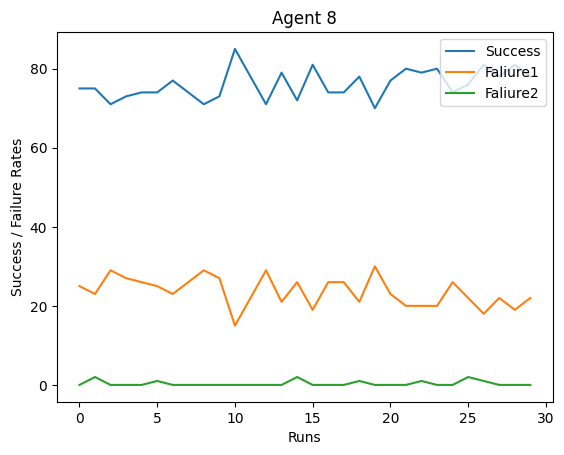

In [ ]:

#* Agent 8

Success = [75, 75, 71, 73, 74, 74, 77, 74, 71, 73, 85, 78, 71, 79, 72, 81, 74, 74, 78, 70, 77, 80, 79, 80, 74, 76, 81, 78, 81, 78]
Faliure1 =   [25, 23, 29, 27, 26, 25, 23, 26, 29, 27, 15, 22, 29, 21, 26, 19, 26, 26, 21, 30, 23, 20, 20, 20, 26, 22, 18, 22, 19, 22]  
Faliure2 =   [0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0]

plt.plot(Success,label = "Success")
plt.plot(Faliure1,label = "Faliure1")
plt.plot(Faliure2,label = "Faliure2")
plt.legend(loc = "upper right")
plt.title("Agent 8")
plt.xlabel("Runs")
plt.ylabel("Success / Failure Rates")
plt.show()


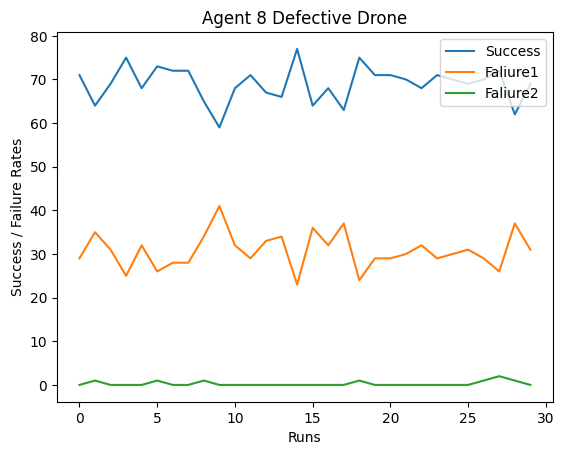

In [ ]:
Success =  [71, 64, 69, 75, 68, 73, 72, 72, 65, 59, 68, 71, 67, 66, 77, 64, 68, 63, 75, 71, 71, 70, 68, 71, 70, 69, 70, 72, 62, 69]  
Faliure1 =  [29, 35, 31, 25, 32, 26, 28, 28, 34, 41, 32, 29, 33, 34, 23, 36, 32, 37, 24, 29, 29, 30, 32, 29, 30, 31, 29, 26, 37, 31]  
Faliure2 =   [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0]
plt.plot(Success,label = "Success")
plt.plot(Faliure1,label = "Faliure1")
plt.plot(Faliure2,label = "Faliure2")
plt.legend(loc = "upper right")
plt.title("Agent 8 Defective Drone")
plt.xlabel("Runs")
plt.ylabel("Success / Failure Rates")
plt.show()

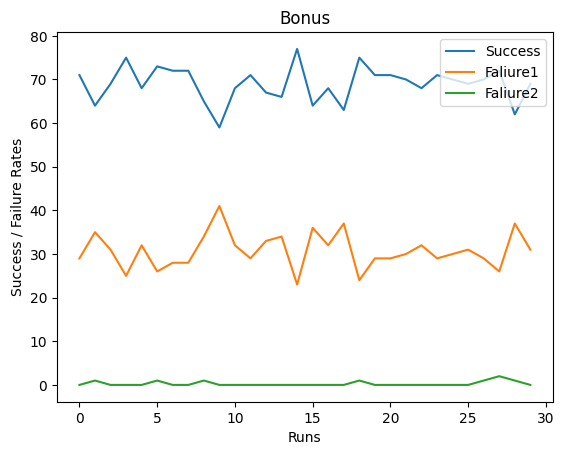

In [ ]:
Success = [71, 64, 69, 75, 68, 73, 72, 72, 65, 59, 68, 71, 67, 66, 77, 64, 68, 63, 75, 71, 71, 70, 68, 71, 70, 69, 70, 72, 62, 69]  
Faliure1 =  [29, 35, 31, 25, 32, 26, 28, 28, 34, 41, 32, 29, 33, 34, 23, 36, 32, 37, 24, 29, 29, 30, 32, 29, 30, 31, 29, 26, 37, 31]  
Faliure2 =  [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0]
plt.plot(Success,label = "Success")
plt.plot(Faliure1,label = "Faliure1")
plt.plot(Faliure2,label = "Faliure2")
plt.legend(loc = "upper right")
plt.title("Bonus")
plt.xlabel("Runs")
plt.ylabel("Success / Failure Rates")
plt.show()
